In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv('day.csv', sep=',')
display(df.head())
display(df.tail())
display(df.describe().round(3))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000,731.0000
mean,366.0000,2.4970,0.5010,6.5200,0.0290,2.9970,0.6840,1.3950,0.4950,0.4740,0.6280,0.1900,848.1760,3656.1720,4504.3490
std,211.1660,1.1110,0.5000,3.4520,0.1670,2.0050,0.4650,0.5450,0.1830,0.1630,0.1420,0.0770,686.6220,1560.2560,1937.2110
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0590,0.0790,0.0000,0.0220,2.0000,20.0000,22.0000
25%,183.5000,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,0.3370,0.3380,0.5200,0.1350,315.5000,2497.0000,3152.0000
50%,366.0000,3.0000,1.0000,7.0000,0.0000,3.0000,1.0000,1.0000,0.4980,0.4870,0.6270,0.1810,713.0000,3662.0000,4548.0000
75%,548.5000,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,0.6550,0.6090,0.7300,0.2330,1096.0000,4776.5000,5956.0000
max,731.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,0.8620,0.8410,0.9720,0.5070,3410.0000,6946.0000,8714.0000


- No missing values.
- Values inside are already standardized.

In [3]:
df['dteday'] = pd.to_datetime(df['dteday'])
# Drop instant column
df = df.drop('instant', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## [Meta Prophet API](https://facebook.github.io/prophet/docs/quick_start.html)
- The input to Prophet is always a dataframe with two columns: `ds` and `y`. The ds (datestamp) column should be of a format expected by Pandas, ideally `YYYY-MM-D`D for a date or `YYYY-MM-DD HH:MM:SS` for a timestamp.
- The y column must be numeric, and represents the measurement we wish to forecast.

In [4]:
# Replace column names for Prophet
df2 = df[['dteday','cnt']]
df2 = df2.rename(columns={'dteday': 'ds', 'cnt':'y'})
df2.head()

,ds,y
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


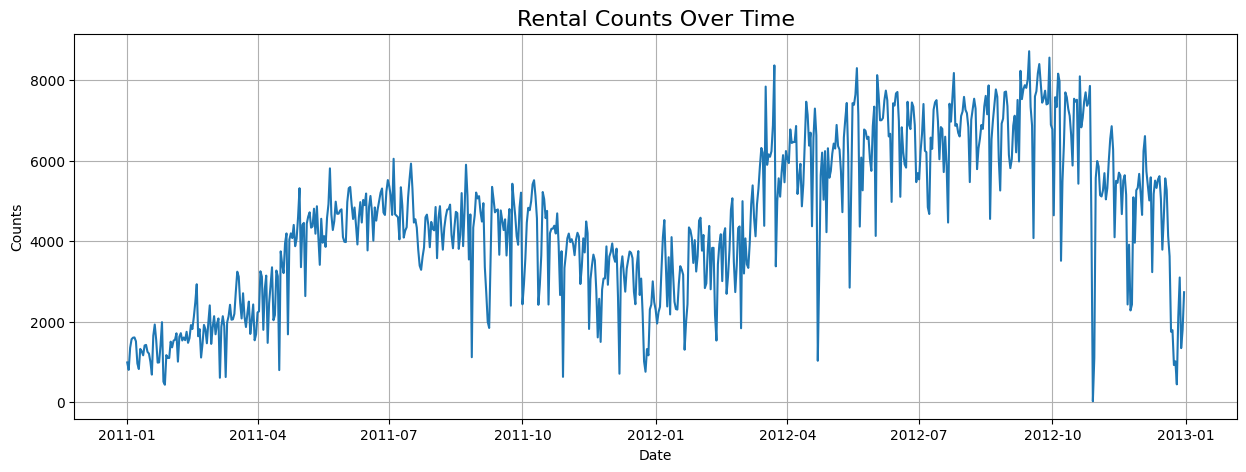

In [5]:
plt.figure(figsize=(15, 5))
plt.plot(df2['ds'], df2['y'], label='rental counts')
plt.title('Rental Counts Over Time', size=16)
plt.xlabel('Date')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

In [6]:
# setting mday to cut the data
mday = pd.to_datetime('2012-11-1')

# training and test set directly using .loc
x_train = df2.loc[df2['ds'] < mday]
x_test = df2.loc[df2['ds'] >= mday]
dates_test = x_test['ds']
dates_test

670   2012-11-01
671   2012-11-02
672   2012-11-03
673   2012-11-04
674   2012-11-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: ds, Length: 61, dtype: datetime64[ns]

In [7]:
from prophet import Prophet
model = Prophet(interval_width=0.95, # confidence interval (default 80%)
                yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
                seasonality_mode='multiplicative')
model.fit(x_train)

12:30:00 - cmdstanpy - INFO - Chain [1] start processing
12:30:00 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future1 = model.make_future_dataframe(periods=61, freq='D') # we predict 61 days, freq=daily
display(future1.head())
display(future1.tail())

,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


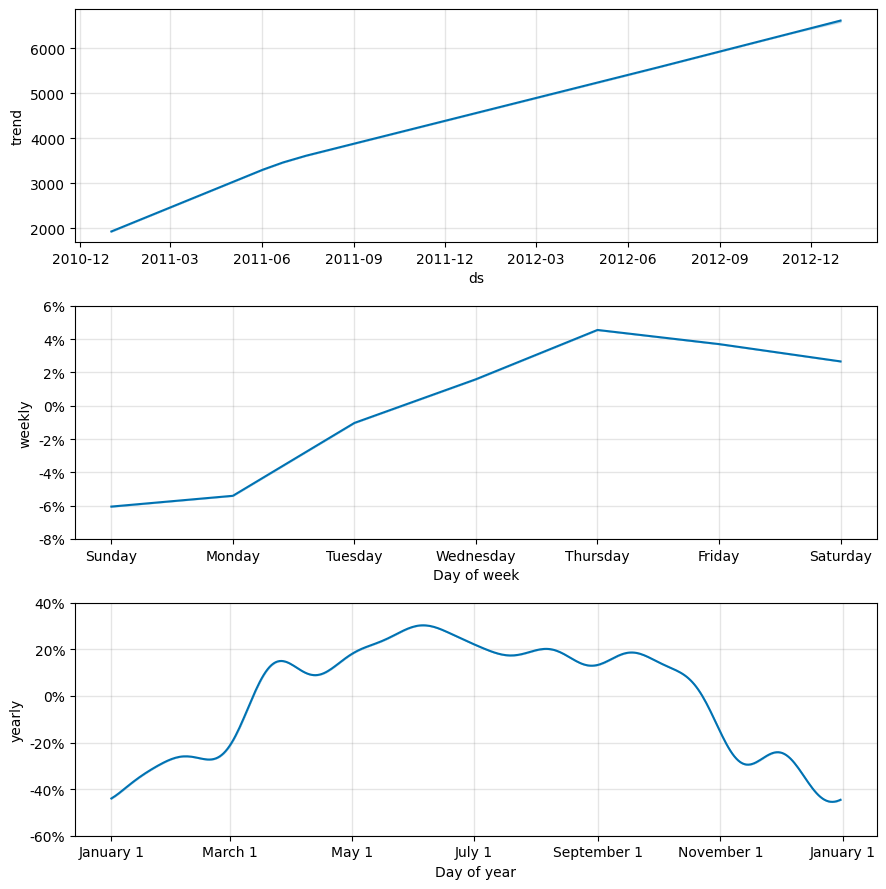

In [9]:
fcst1 = model.predict(future1)
fig = model.plot_components(fcst1)
plt.show()

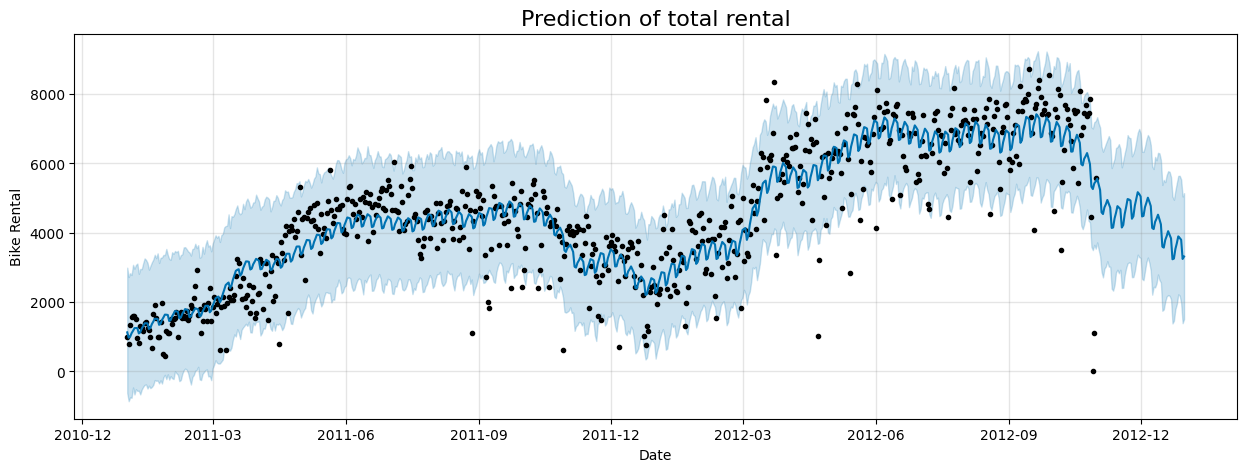

In [10]:
# Plot the entire training and validation dat
fig, ax = plt.subplots(figsize=(15,5))
model.plot(fcst1, ax=ax, uncertainty=True)
ax.set_xlabel('Date')
ax.set_ylabel('Bike Rental')
plt.title('Prediction of total rental', fontsize=16)
plt.show()

In [11]:
# result table
fcst1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01,1928.2078,-625.3811,2992.4796,1928.2078,1928.2078,-0.4159,-0.4159,-0.4159,0.0266,0.0266,0.0266,-0.4425,-0.4425,-0.4425,0.0000,0.0000,0.0000,1126.3578
1,2011-01-02,1937.2708,-860.2249,2723.5404,1937.2708,1937.2708,-0.4981,-0.4981,-0.4981,-0.0606,-0.0606,-0.0606,-0.4375,-0.4375,-0.4375,0.0000,0.0000,0.0000,972.2972
2,2011-01-03,1946.3338,-750.3907,2833.0655,1946.3338,1946.3338,-0.4861,-0.4861,-0.4861,-0.0541,-0.0541,-0.0541,-0.4320,-0.4320,-0.4320,0.0000,0.0000,0.0000,1000.2510
3,2011-01-04,1955.3969,-760.6603,2781.3215,1955.3969,1955.3969,-0.4363,-0.4363,-0.4363,-0.0103,-0.0103,-0.0103,-0.4259,-0.4259,-0.4259,0.0000,0.0000,0.0000,1102.2890
4,2011-01-05,1964.4599,-463.9517,3074.3544,1964.4599,1964.4599,-0.4036,-0.4036,-0.4036,0.0159,0.0159,0.0159,-0.4195,-0.4195,-0.4195,0.0000,0.0000,0.0000,1171.5224


Prophet returns a  DataFrame, but we subset our output to the columns most relevant to forecasting. These are:

- **yhat**: the predicted value of our metric
- **yhat_lower**: the lower bound of our forecasts
- **yhat_upper**: the upper bound of our forecasts

In [12]:
# ypred1: extract fcst1 result
ypred1 = fcst1[-61:][['yhat']].values
ytest = x_test['y'].values

from sklearn.metrics import r2_score
score = r2_score(ytest, ypred1)
print(f'R2 score:{score:.4f}')

R2 score:0.2942


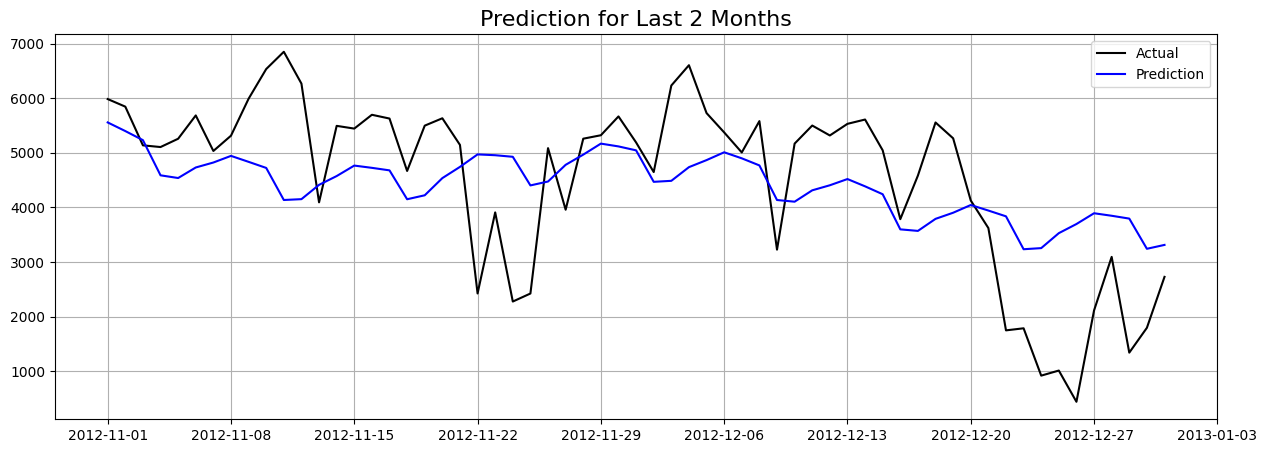

In [13]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(dates_test, ytest, label='Actual', c='k')
ax.plot(dates_test, ypred1, label='Prediction', c='b')

weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#ax.tick_params(axis='x', rotation=45)
ax.grid()
ax.legend()
ax.set_title('Prediction for Last 2 Months',fontsize=16)
plt.show()

### Adding `holiday` feature into model

In [14]:
# Extract holiday
df_holiday = df[df['holiday']==1]
holiday_value = df_holiday['dteday'].values

# Convert to data frame format
holidays = pd.DataFrame({'holiday': 'holiday',
    'ds': holiday_value,
    'lower_window': 0,
    'upper_window': 0
})

display(holidays.head())

,holiday,ds,lower_window,upper_window
0,holiday,2011-01-17,0,0
1,holiday,2011-02-21,0,0
2,holiday,2011-04-15,0,0
3,holiday,2011-05-30,0,0
4,holiday,2011-07-04,0,0


12:30:01 - cmdstanpy - INFO - Chain [1] start processing
12:30:01 - cmdstanpy - INFO - Chain [1] done processing


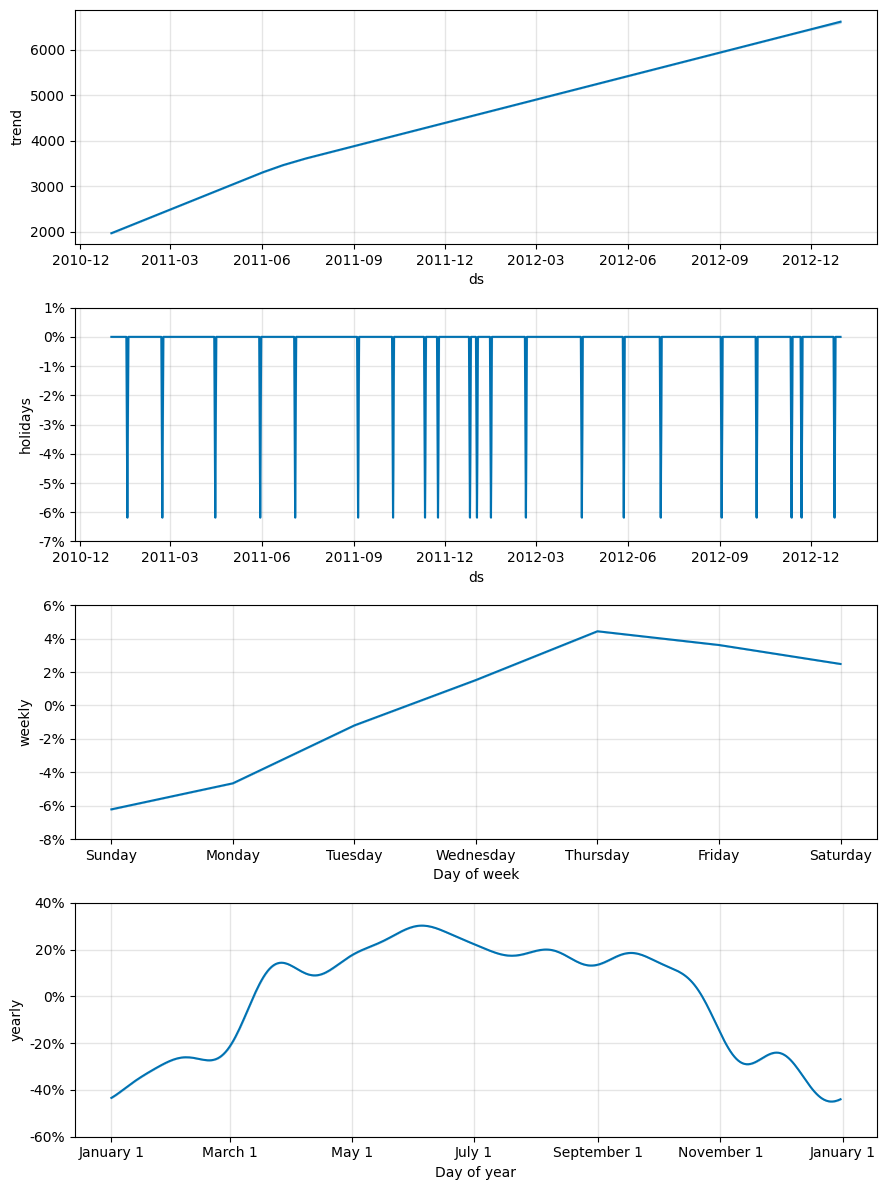

In [15]:
model2 = Prophet(interval_width=0.95,
             yearly_seasonality=True,weekly_seasonality=True, daily_seasonality=False,
             holidays = holidays, seasonality_mode='multiplicative')

# training
model2.fit(x_train)
# predict
fcst2 = model2.predict(future1)

fig = model2.plot_components(fcst2)
plt.show()

- From `holiday` trend, we can see the total number of bike rentals during holidays dropped by more than 6%.

In [16]:
# ypred2: extract fcst2 result
ypred2 = fcst2[-61:][['yhat']].values

score = r2_score(ytest, ypred2)
print(f'R2 score:{score:.4f}')

R2 score:0.3037


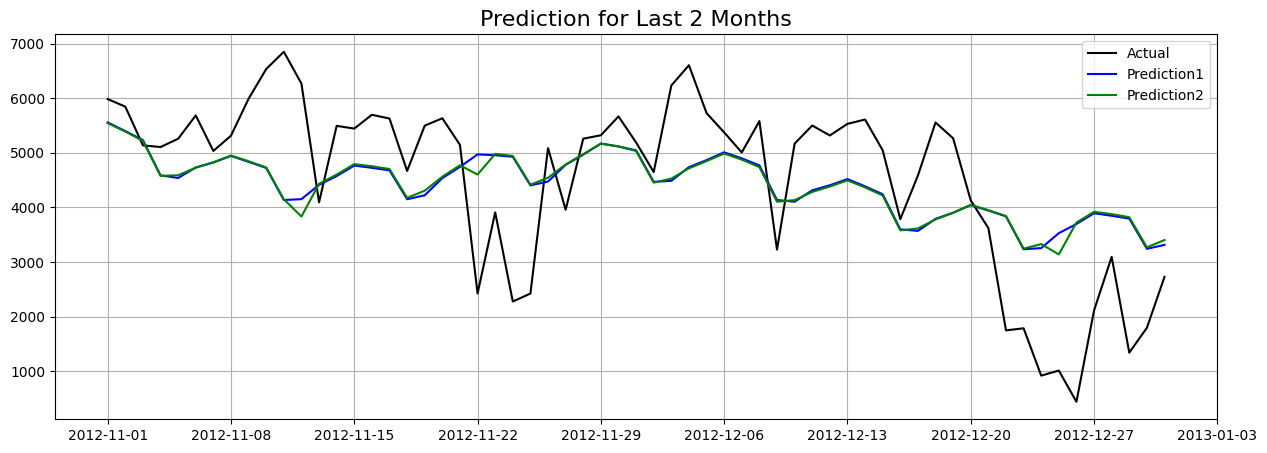

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(dates_test, ytest, label='Actual', c='k')
ax.plot(dates_test, ypred1, label='Prediction1', c='b')
ax.plot(dates_test, ypred2, label='Prediction2', c='g')

weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#ax.tick_params(axis='x', rotation=45)
ax.grid()
ax.legend()
ax.set_title('Prediction for Last 2 Months',fontsize=16)
plt.show()

### Adding more features
1. Weather situation
2. Temperature
3. Apparent temperature
4. Humidity
5. Wind speed
6. Season

Prophet algorithm is internally a single-variable nonlinear function composed of multiple trigonometric functions and cannot accept additional variables. Therefore, other variables can only be regarded as additional variables, and we can add them using `add_regressor()` function.

In [18]:
df3 = pd.concat([df2, df[['weathersit', 'temp', 'atemp', 'hum','windspeed','season']]], axis=1)

x2_train = df3.loc[df3['ds'] < mday]
x2_test = df3.loc[df3['ds'] >= mday]

display(x2_train.tail())

,ds,y,weathersit,temp,atemp,hum,windspeed,season
665,2012-10-27,7852,2,0.5300,0.5151,0.7200,0.2357,4
666,2012-10-28,4459,2,0.4775,0.4678,0.6946,0.3980,4
667,2012-10-29,22,3,0.4400,0.4394,0.8800,0.3582,4
668,2012-10-30,1096,2,0.3182,0.3099,0.8255,0.2130,4
669,2012-10-31,5566,2,0.3575,0.3611,0.6667,0.1667,4


12:30:02 - cmdstanpy - INFO - Chain [1] start processing
12:30:02 - cmdstanpy - INFO - Chain [1] done processing


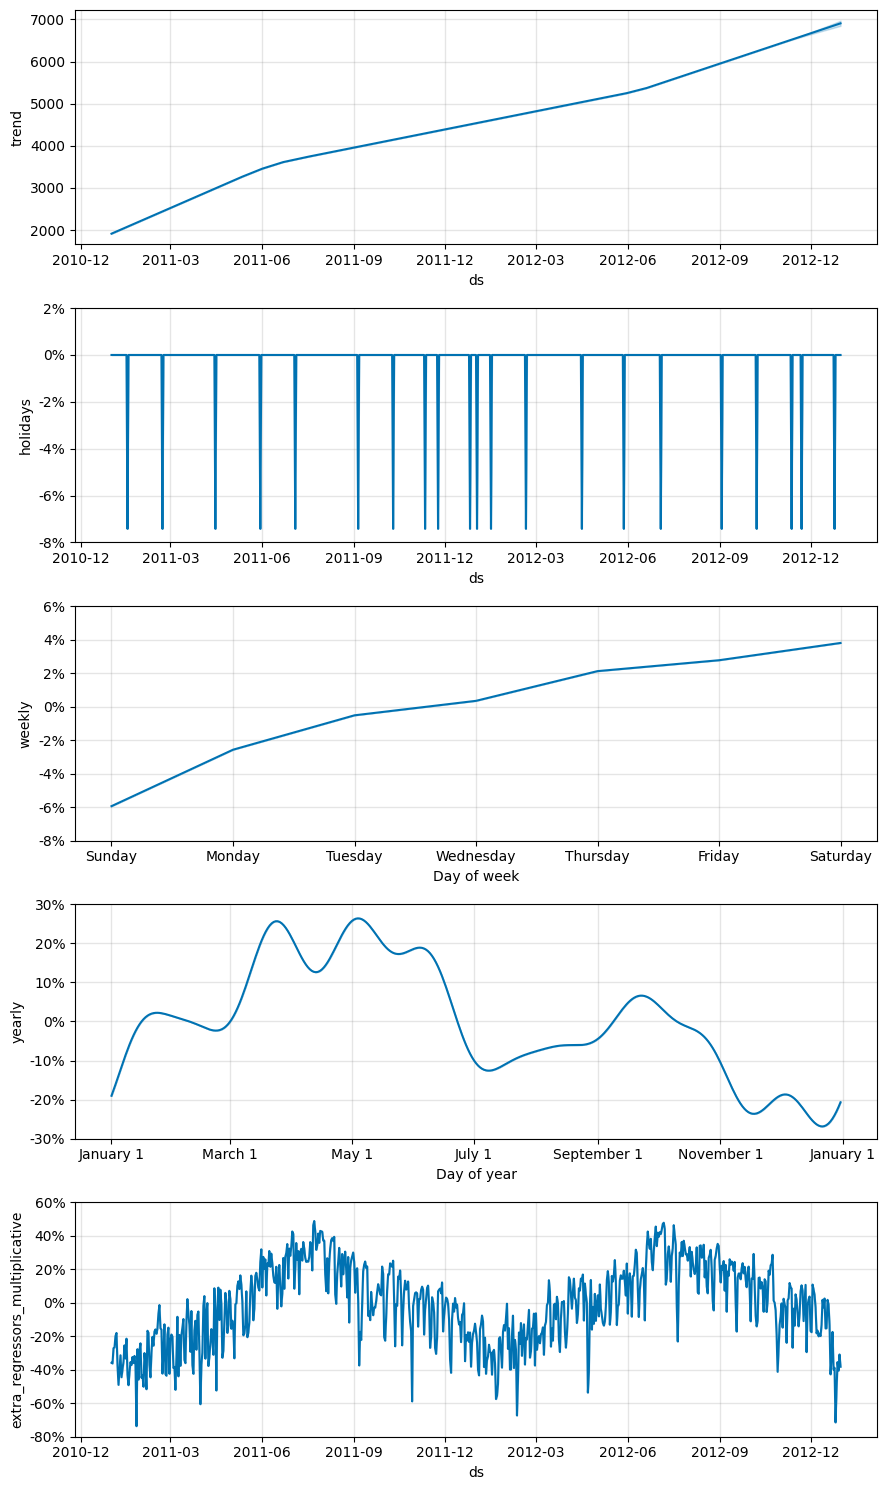

In [19]:
model3 = Prophet(interval_width=0.95,
             yearly_seasonality=True,weekly_seasonality=True, daily_seasonality=False,
             holidays = holidays, seasonality_mode='multiplicative')

model3.add_regressor('weathersit')
model3.add_regressor('temp')
model3.add_regressor('atemp')
model3.add_regressor('hum')
model3.add_regressor('windspeed')
model3.add_regressor('season')

# training
model3.fit(x2_train)
# predict
future3 = df3[['ds','weathersit', 'temp', 'atemp', 'hum','windspeed','season']]
fcst3 = model3.predict(future3)

fig = model3.plot_components(fcst3)
plt.show()

In [20]:
# ypred3: extract fcst3 result
ypred3 = fcst3[-61:][['yhat']].values

score = r2_score(ytest, ypred3)
print(f'R2 score:{score:.4f}')

R2 score:0.6104


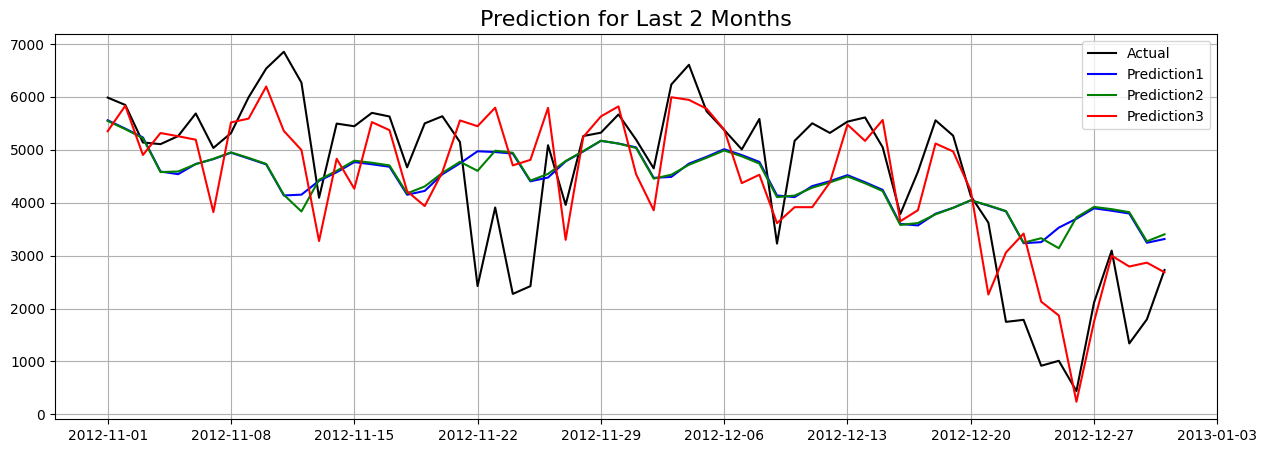

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(dates_test, ytest, label='Actual', c='k')
ax.plot(dates_test, ypred1, label='Prediction1', c='b')
ax.plot(dates_test, ypred2, label='Prediction2', c='g')
ax.plot(dates_test, ypred3, label='Prediction3', c='r')

weeks = mdates.WeekdayLocator(byweekday=mdates.TH)
ax.xaxis.set_major_locator(weeks)

#ax.tick_params(axis='x', rotation=45)
ax.grid()
ax.legend()
ax.set_title('Prediction for Last 2 Months',fontsize=16)
plt.show()

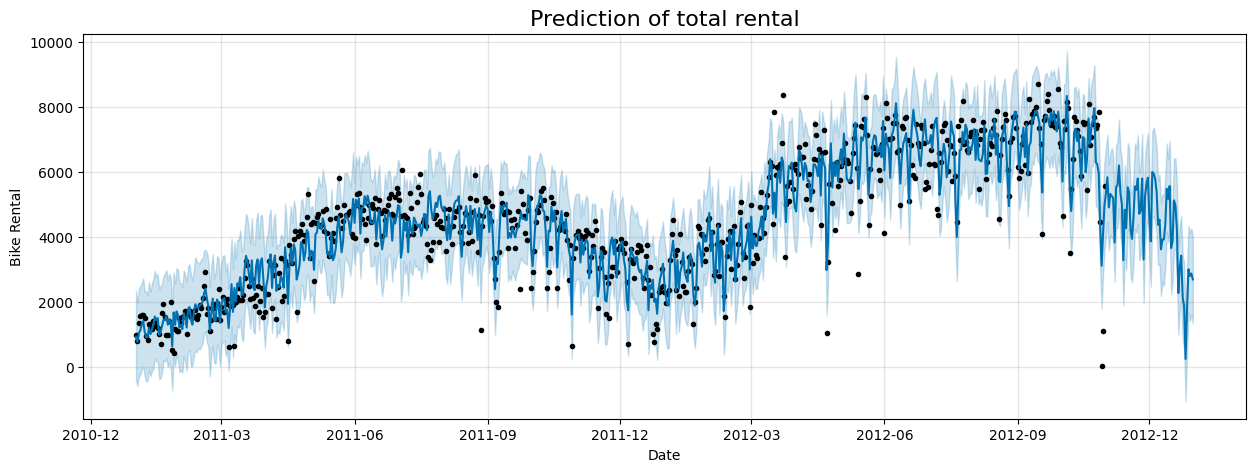

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
model.plot(fcst3, ax=ax, uncertainty=True)
ax.set_xlabel('Date')
ax.set_ylabel('Bike Rental')
plt.title('Prediction of total rental', fontsize=16)
plt.show()

- From the visual above, we can see the prediction results is much more better after adding temperature and weather condition.
- **R^2** score from 0.29 increases to 0.61.

Now, we would like to like to use different TSA approach to compare results.

## [Auto-ARIMA](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)

**ARIMA** and **Auto-ARIMA** are both methodologies used for time series forecasting, but they differ primarily in how the model parameters are selected.

**ARIMA** is a traditional time series forecasting technique that combines autoregressive (AR), differencing (I), and moving average (MA) components:
- **AR** (Autoregressive): The model predicts future values based on past values.
- **I** (Integrated): This involves differencing the time series to make it stationary, i.e., removing trends and seasonality to stabilize the mean.
- **MA** (Moving Average): The model uses past forecast errors in a regression-like model.
  
Choosing the parameters `p` (AR order), `d` (degree of differencing), and `q` (MA order) in ARIMA is crucial for the model's performance. Traditionally, these parameters are selected based on diagnostic plots like `Autocorrelation Function (ACF)` and `Partial Autocorrelation Function (PACF)`.

**Auto-ARIMA** automates the process of ARIMA modeling, including the selection of p, d, and q parameters. It effectively simplifies the process of model building by searching through a range of model parameters and selecting the best combination based on a given criterion, typically the `Akaike Information Criterion (AIC)` or the `Bayesian Information Criterion (BIC)`.

Features of Auto-ARIMA include:
1. Automated Model Selection: It iterates over various combinations of parameters (p, d, q), including seasonal parameters if necessary (P, D, Q).
2. Stationarity Checks: Auto-ARIMA can automatically determine the d parameter by applying statistical tests like the Augmented Dickey-Fuller (ADF) test to check if differencing is required.
3. Seasonality Detection: It can automatically detect seasonal patterns and apply seasonal differencing if specified.
4. Efficiency: It often uses a stepwise approach to explore the parameter space, which can be more efficient than an exhaustive search.

In [23]:
df4 = df3.copy()
df4.index = pd.to_datetime(df4['ds'])  # Set datetime index
df4 = df4.drop('ds', axis=1)  # Remove the date column
df4

,y,weathersit,temp,atemp,hum,windspeed,season
ds,,,,,,,
2011-01-01,985,2,0.3442,0.3636,0.8058,0.1604,1
2011-01-02,801,2,0.3635,0.3537,0.6961,0.2485,1
2011-01-03,1349,1,0.1964,0.1894,0.4373,0.2483,1
2011-01-04,1562,1,0.2000,0.2121,0.5904,0.1603,1
2011-01-05,1600,1,0.2270,0.2293,0.4370,0.1869,1
...,...,...,...,...,...,...,...
2012-12-27,2114,2,0.2542,0.2266,0.6529,0.3501,1
2012-12-28,3095,2,0.2533,0.2550,0.5900,0.1555,1
2012-12-29,1341,2,0.2533,0.2424,0.7529,0.1244,1


#### Stationarity Check

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

def adf_test(col):
    result = adfuller(col.dropna(), autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print(f"The {col.name} series is stationary.")
    else:
        print(f"The {col.name} series is \033[1;31mnot stationary\033[0m.")

In [25]:
data = df4.asfreq('D')   # 'D' for daily frequency
train = data[data.index < mday]
test = data[data.index >= mday]

for col in train:
    if col != 'season':
        adf_test(train[col])
        print('\n')

ADF Statistic: -1.869336962822329
p-value: 0.34662056220955184
The y series is not stationary.


ADF Statistic: -17.07739176619595
p-value: 7.749506815358512e-30
The weathersit series is stationary.


ADF Statistic: -2.055999150087334
p-value: 0.26257144729025395
The temp series is not stationary.


ADF Statistic: -1.8834181980101543
p-value: 0.33990146770331886
The atemp series is not stationary.


ADF Statistic: -4.8411270085637526
p-value: 4.5344621029037255e-05
The hum series is stationary.


ADF Statistic: -4.028822516925563
p-value: 0.0012668847609788145
The windspeed series is stationary.




In [26]:
# Try first differencing
for col in train:
    if col != 'season':
        col_diff1 = train[col].diff(1).dropna()
        adf_test(col_diff1)
        print('\n')

ADF Statistic: -11.245335957734998
p-value: 1.7653798281651603e-20
The y series is stationary.


ADF Statistic: -11.710454368501006
p-value: 1.4933390571935501e-21
The weathersit series is stationary.


ADF Statistic: -11.2453297386
p-value: 1.7654391513684865e-20
The temp series is stationary.


ADF Statistic: -8.078675584595933
p-value: 1.4815733737633297e-12
The atemp series is stationary.


ADF Statistic: -9.534392435958585
p-value: 2.834272803654725e-16
The hum series is stationary.


ADF Statistic: -12.720515477493812
p-value: 9.850405090158094e-24
The windspeed series is stationary.




- After first differencing, all varaibles are stationary (P < 0.05).
#### Plot the sample visualization of `y`

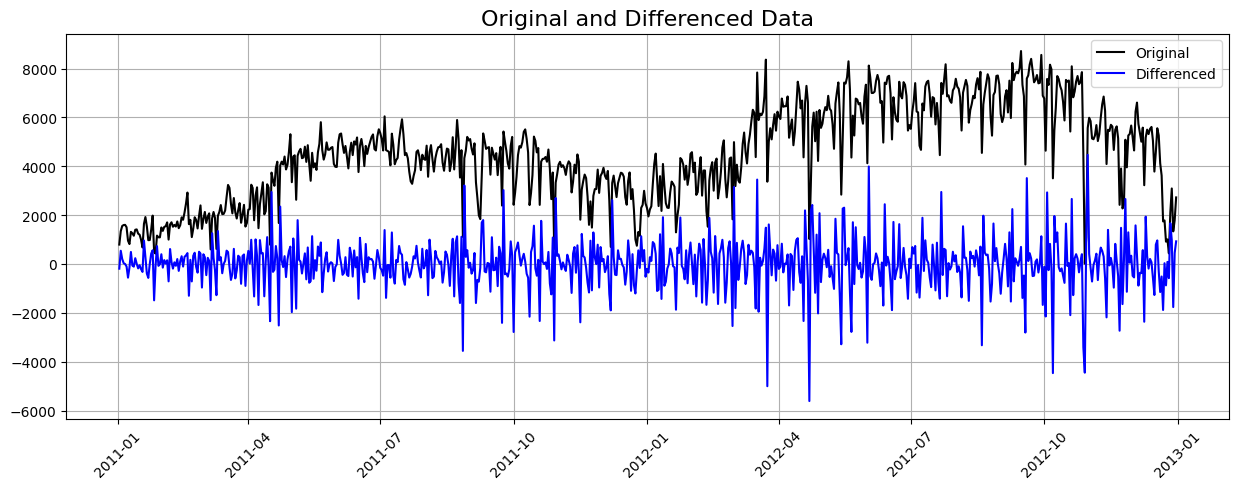

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df4.index[1:], df4['y'][1:], label='Original', c='k')  # Skip the first value as it has no difference
ax.plot(df4.index[1:], df4['y'].diff(1).dropna(), label='Differenced', c='b')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend()
ax.set_title('Original and Differenced Data', fontsize=16)
plt.show()

#### Decide `p` and `q` value for **AR**(Auto Regressive) and **MA**(Moving average)
#### Interpretation:
- **PACF (Partial Autocorrelation Function)**: Look at the PACF plot (second plot) to find out where the plot cuts off the significance limit for the first time. This point suggests the AR terms (p).
- **ACF (Autocorrelation Function)**: Look at the ACF plot (first plot) to find out where the plot cuts off the significance limit for the first time. This point suggests the MA terms (q).

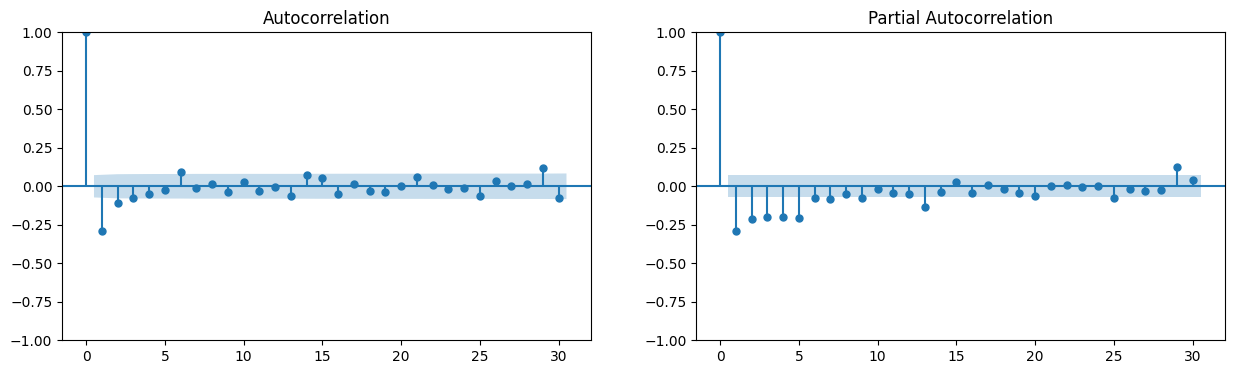

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot the ACF
plot_acf(df4['y'].diff(1).dropna(), lags=30, ax=axes[0])

# Plot the PACF
plot_pacf(df4['y'].diff(1).dropna(), lags=30, ax=axes[1])

plt.show()

Given these observations, a starting model could be ARIMA(1,1,1), where:

- **1** for **AR(p)**: The partial autocorrelation is significant at the first lag.
- **1** for **I(d)**: We’ve  determined that the series is stationary after first differencing.
- **1** for **MA(q)1** for **I(d)**: The autocorrelation is significant at the first lag but then quickly becomes insignificant.

#### Modeling

In [29]:
from pmdarima import auto_arima
import itertools

data = df3.copy()
data['holiday']=df['holiday']
train = data.loc[data.ds < mday]
test = data.loc[data.ds >= mday] 

# Run the auto_arima function
auto_arima_model = auto_arima(y=train['y'], X=train.drop(columns=['ds','y','holiday']),
                              start_p=1, start_q=1, max_p=5, max_q=5,test='adf',exogenous=train.holiday,
                              seasonal=False,trace=True, stationary=False, error_action='ignore',
                              suppress_warnings=True, information_criterion='aic',stepwise=True)

print(auto_arima_model.summary())
print(auto_arima_model.params)

# Make predictions
predictions = auto_arima_model.predict(n_periods=len(test), X=test.drop(columns=['ds','y','holiday']), alpha=0.05)

# Calculate R2 and MAPE
r2 = r2_score(test.y, predictions)
mape = np.mean(np.abs((test.y - predictions) / test.y)) * 100

# Print out the metrics
print(f"Test Set R2 Score: {r2:.3f}")
print(f"Test Set MAPE: {mape:.3f}")

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10887.578, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11654.839, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11024.566, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11317.531, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10938.579, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=10916.473, Time=0.41 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=11195.605, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11007.042, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=10933.930, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10964.220, Time=0.32 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 2.935 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  670
Model:               SARIMAX(1, 0, 1)   Log Likeliho

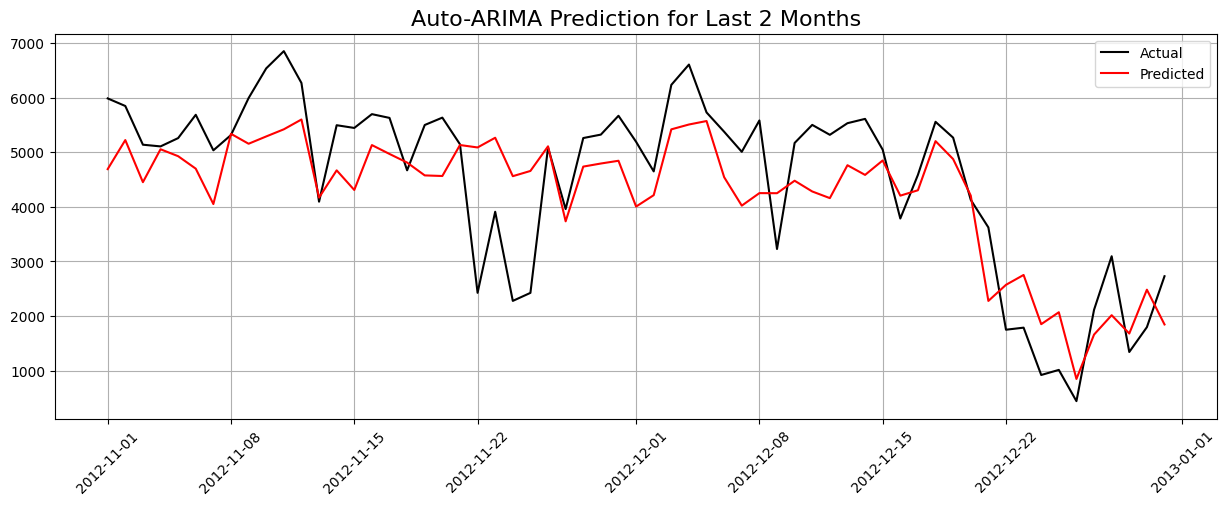

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(test.ds, test.y, label='Actual', c='k')  # Skip the first value as it has no difference
ax.plot(test.ds, predictions, label='Predicted', c='r')
ax.tick_params(axis='x', rotation=45)
ax.grid()
ax.legend()
ax.set_title('Auto-ARIMA Prediction for Last 2 Months',fontsize=16)
plt.show()

### Conclusion:
- Initially, we used Prophet univariate model for prediction and the result was 0.29. With the addition of variables such as weather and temperature, the model performance improved to 0.61.
- We compare the results of different time series models. In the Auto-ARIMA model, the best result is 0.63, which is not much different from the performance of Prophet.

### Future Steps:
- Time series models are suitable for predicting values that are highly periodical and have few changing factors. On the contrary, if the greater impact is non-periodic events, such as irregular rainy days, fog, etc., it may be more appropriate to choose another regression model.